# Belief Propagation Sandbox

For testing particle belief propagation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.sim import spider

%matplotlib inline

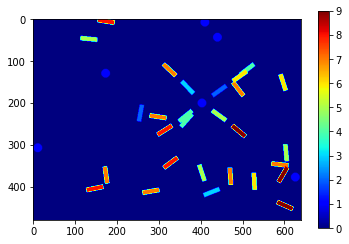

In [2]:
scene = spider.Scene(20, 5)
obs = scene.observation()

plt.imshow(obs, cmap=plt.get_cmap("jet"))
plt.colorbar()

In [3]:
from src.sim import likelihoods

img = scene.image(obs)
spi_obs = scene.spider.observation()
score = likelihoods.spider_ave_score(obs, scene.spider)

noisy_spider = spider.Spider(scene.spider.x, scene.spider.y)
noisy_spi_obs = noisy_spider.observation()
noisy_score = likelihoods.spider_ave_score(obs, noisy_spider)

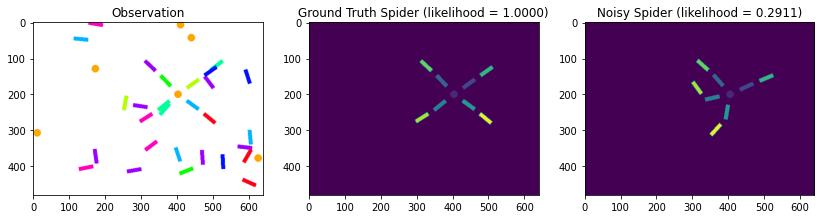

In [4]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title("Ground Truth Spider (likelihood = {:.4f})".format(score))
plt.imshow(spi_obs)
plt.subplot(1, 3, 3)
plt.title("Noisy Spider (likelihood = {:.4f})".format(noisy_score))
plt.imshow(noisy_spi_obs)

## Particle Belief Propagation

In [5]:
from src.sim import graph

g = graph.SpiderGraph(50)
g.init_random()

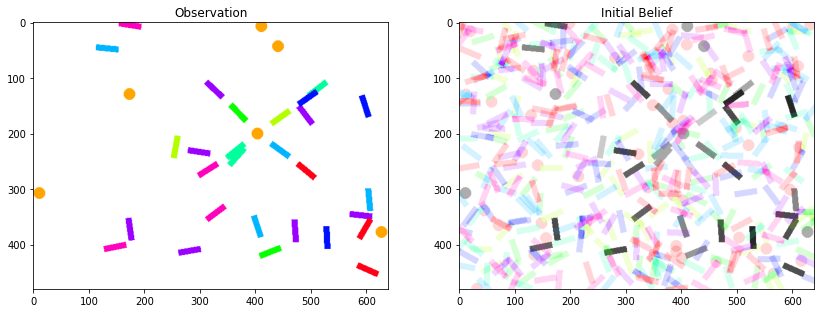

In [6]:
initial_bel = scene.display_belief(g.marginals(), img)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Initial Belief")
plt.imshow(initial_bel)

In [ ]:
# Run iterations.
ITERS = 5
for i in range(ITERS):
    g.update_messages(obs)
    g.update_belief(obs)
    
    bel = scene.display_belief(g.marginals(), img)

    plt.title("Belief at iteration {}".format(i + 1))
    plt.imshow(bel)
    
    g.resample()
    g.jitter()